# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

Для воспроизводимости результатов.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [15]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [16]:
# your code here
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [17]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

In [18]:
missing_values = df_train.isna().sum()
missing_values[missing_values != 0].index.to_list()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [19]:
duplicated_rows = df_train.duplicated()
duplicated_rows[duplicated_rows == True]

254     True
258     True
324     True
325     True
326     True
        ... 
6880    True
6881    True
6989    True
6997    True
6998    True
Length: 985, dtype: bool

In [20]:
from IPython.display import clear_output

In [21]:
!pip install ydata-profiling
clear_output()

In [22]:
from ydata_profiling import ProfileReport


profile = ProfileReport(df_train, title = "Profiling Report")
profile.to_file("report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [23]:
df_train['seats'].isna().sum(), df_test['seats'].isna().sum()

(202, 19)

In [24]:
# your code here
seats_median = df_train['seats'].median()
df_train['seats'].fillna(seats_median, inplace = True)
df_test['seats'].fillna(seats_median, inplace = True)

clear_output()

In [26]:
df_train['seats'].isna().sum(), df_test['seats'].isna().sum()

(0, 0)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [27]:
# your code here
duplicated_rows = df_train.drop(['selling_price'], axis = 1).duplicated()
duplicated_rows[duplicated_rows == True].shape

(1159,)

In [28]:
df_train[duplicated_rows]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [29]:
feature_columns = df_train.drop(['selling_price'], axis = 1).columns.to_list()
df_train.drop_duplicates(feature_columns, inplace = True)

In [30]:
df_train.reset_index(inplace = True, drop = True)

In [31]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [32]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [33]:
# your code here

# google: One liter of gasoline weighs between 0.71 and 0.78 kilograms, depending on its precise composition; therefore 1kg occupies between 1/0.71 = 1.41 and 1/0.78 = 1.28 liters.
# значит: X / 1.35

import re


def transform_mileage(s):
  if not pd.isnull(s):
    p1 = re.compile(r"([0-9]+.[0-9]+) ((\bkmpl\b)|(\bkm\/kg\b))")
    p2 = re.compile(r"km\/kg")
    num = float(p1.search(s).group(1))
    if p2.search(s):
      num = round(num/1.35, 2)
    return num
  else:
    return s

In [34]:
df_train['mileage'] = df_train['mileage'].transform(transform_mileage)
df_test['mileage'] = df_test['mileage'].transform(transform_mileage)

In [35]:
def transform_engine(s):
  if not pd.isnull(s):
    p1 = re.compile(r"([0-9]+) CC")
    num = int(p1.search(s).group(1))
    return num
  else:
    return s

In [36]:
df_train['engine'] = df_train['engine'].transform(transform_engine)
df_test['engine'] = df_test['engine'].transform(transform_engine)

In [37]:
def transform_max_power(s):
  if not pd.isnull(s):
    p1 = re.compile(r"([0-9]+.?[0-9]*)? ?(bhp)?")
    num = p1.search(s).group(1)
    if not pd.isnull(num):
      return float(num)
    else:
      return 0
  else:
    return s

In [38]:
df_train['max_power'] = df_train['max_power'].transform(transform_max_power)
df_test['max_power'] = df_test['max_power'].transform(transform_max_power)

In [39]:
df_train.drop(['torque'], axis = 1, inplace = True)
df_test.drop(['torque'], axis = 1, inplace = True)

In [40]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
3  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  
4  Individual       Manual   First Owner    20.14  1197.0      81.86    5.0

In [41]:
mileage_median = df_train['mileage'].median()
df_train['mileage'].fillna(mileage_median, inplace = True)
df_test['mileage'].fillna(mileage_median, inplace = True)

engine_median = df_train['engine'].median()
df_train['engine'].fillna(engine_median, inplace = True)
df_test['engine'].fillna(engine_median, inplace = True)

max_power_median = df_train['max_power'].median()
df_train['max_power'].fillna(max_power_median, inplace = True)
df_test['max_power'].fillna(max_power_median, inplace = True)

clear_output()

In [42]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [43]:
# your code here
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

In [44]:
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [45]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [46]:
# your code here
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.353839  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.967193   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.892354     5.426712  
std      31.661223     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [47]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.288990  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.950053   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.500000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    28.400000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [48]:
df_train.describe(include = 'object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [49]:
df_test.describe(include = 'object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [50]:
# assert df_train.shape == (5840, 13)

# после удаления 'torque' осталось 12 столбцов

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

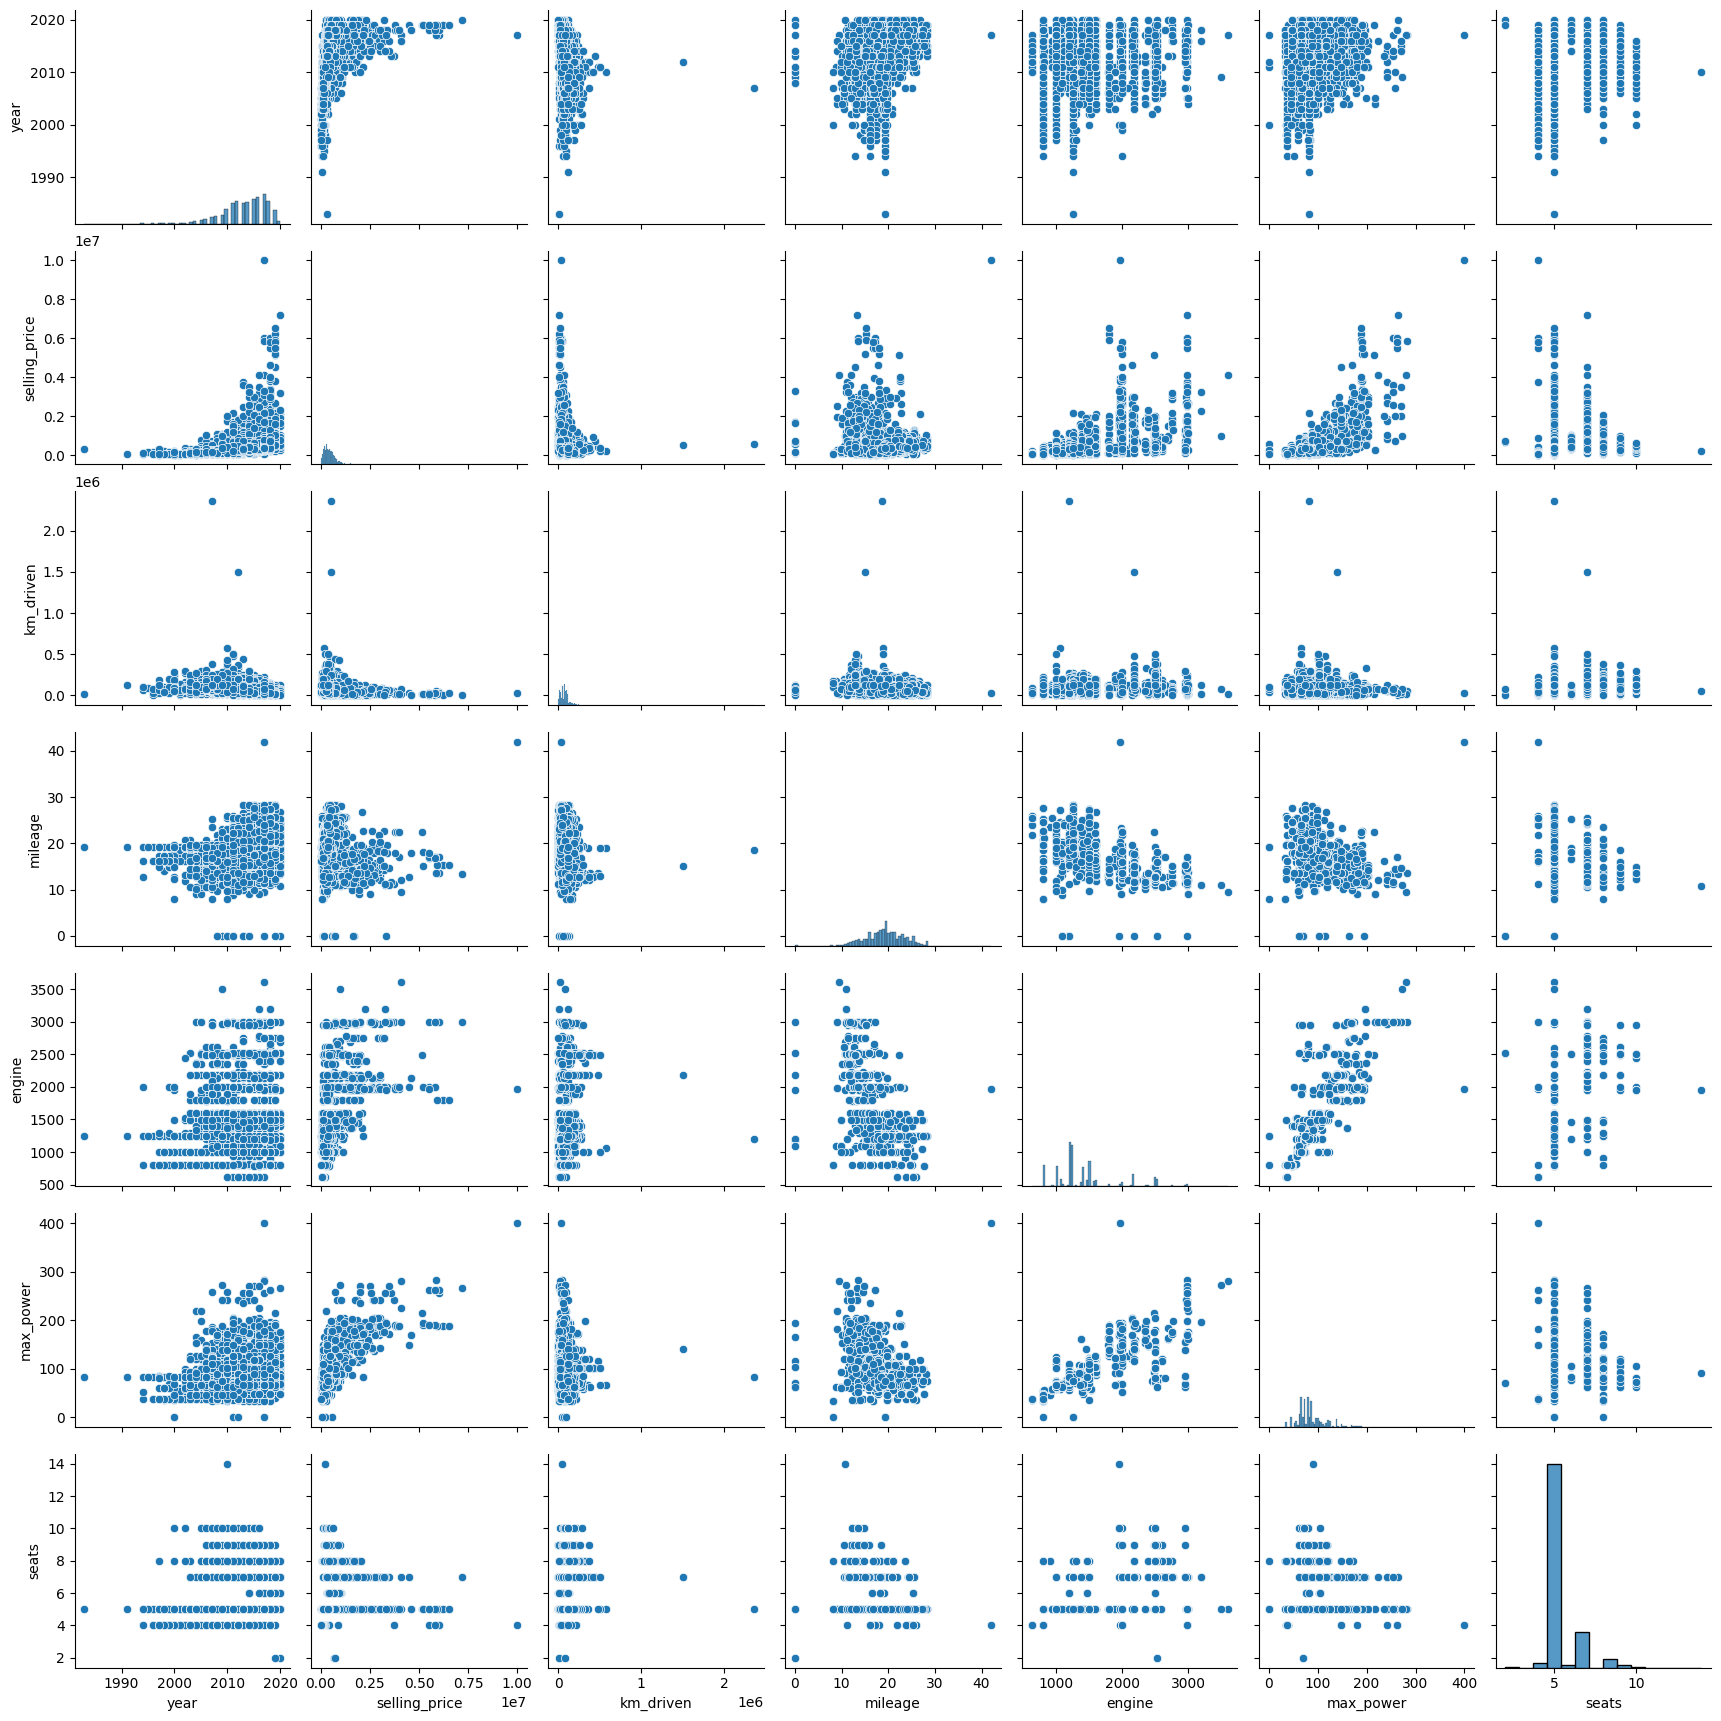

In [51]:
# your code here
sns.pairplot(df_train)

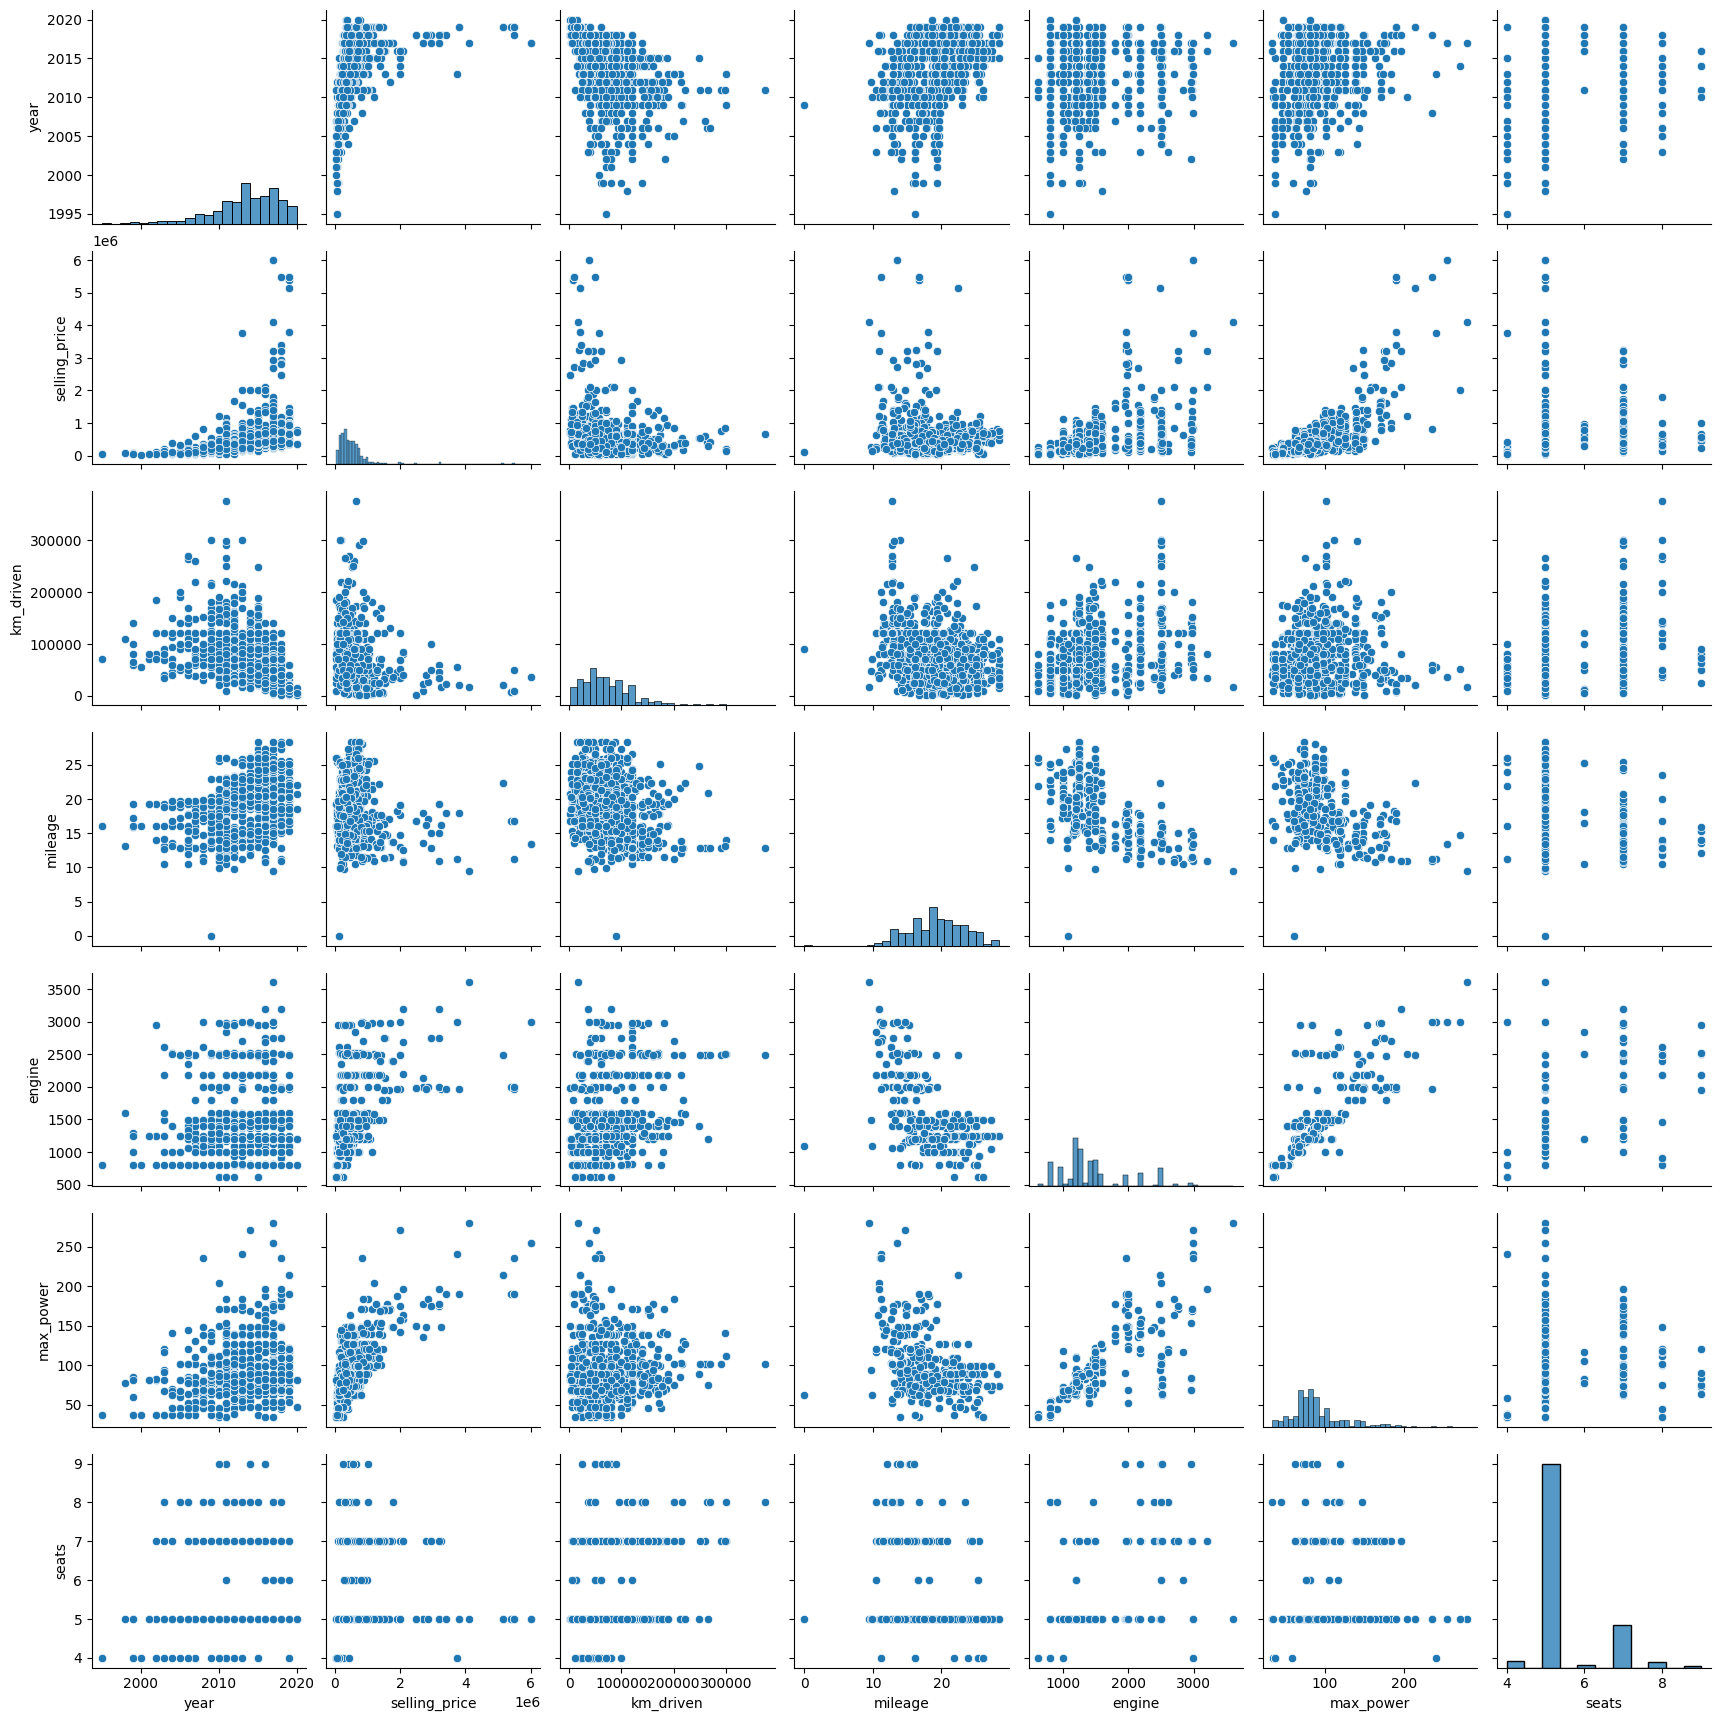

In [52]:
# your code here
sns.pairplot(df_test)

`Your answer here`

Видна связь 'selling_price' с 'engine' и 'max_power'.

Видна линейная зависимость между 'engine' и 'max_power'.

Распределения остались похожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

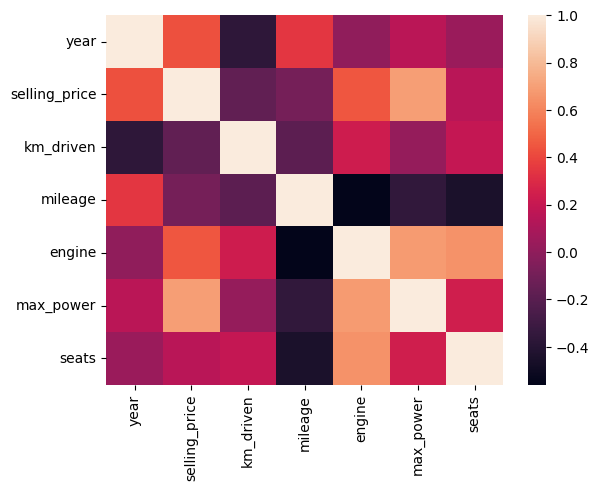

In [53]:
# your code here
corr = df_train.select_dtypes([int, float]).corr()
sns.heatmap(corr)

In [54]:
corr

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342810  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.096364  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182997  0.229766   
mileage        0.342810      -0.096364  -0.182997  1.000000 -0.560509   
engine         0.002819       0.447672   0.229766 -0.560509  1.000000   
max_power      0.158207       0.692725   0.024379 -0.356533  0.681247   
seats          0.041178       0.149953   0.192328 -0.444892  0.652172   

               max_power     seats  
year            0.158207  0.041178  
selling_price   0.692725  0.149953  
km_driven       0.024379  0.192328  
mileage        -0.356533 -0.444892  
engine          0.681247  0.652172  
max_power       1.000000  0.242791  
seats           0.242791  1.000000

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

'year' и 'engine'.

'selling_price' и 'max_power'; 'engine' и 'max_power'; 'engine' и 'seats'.

Да.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

<Axes: >

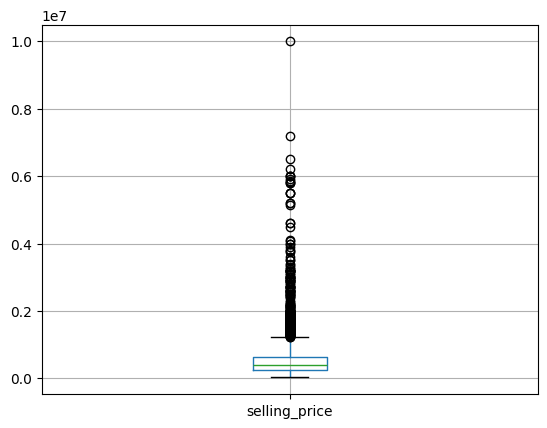

In [55]:
# your code here
df_train.boxplot(column = 'selling_price')

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [56]:
df_train_light = df_train.copy()
df_train_light.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1, inplace = True)

In [57]:
y_train = df_train_light['selling_price'] # your code here
X_train = df_train_light.drop(['selling_price'], axis = 1) # your code here

In [58]:
assert X_train.shape == (5840, 6)

In [59]:
df_test_light = df_test.copy()
df_test_light.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1, inplace = True)

In [60]:
y_test = df_test_light['selling_price'] # your code here
X_test = df_test_light.drop(['selling_price'], axis = 1) # your code here

In [61]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model_1 = LinearRegression()

model_1.fit(X_train, y_train)

print("Train:")
print(f"R^2: {r2_score(model_1.predict(X_train), y_train)}")
print(f"MSE: {MSE(model_1.predict(X_train), y_train)}")

y_pred = model_1.predict(X_test)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test)}")
print(f"MSE: {MSE(y_pred, y_test)}")

Train:
R^2: 0.30863648150194567
MSE: 117166586588.9726


Test:
R^2: -0.14180534009660928
MSE: 233668072418.52295


In [63]:
# Модель недообучается.

In [64]:
model_1.coef_

array([ 3.75340971e+04, -7.31425759e-01,  6.41132696e+03,  1.22601582e+02,
        1.01640016e+04, -2.36554469e+04])

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [65]:
from sklearn.preprocessing import StandardScaler

# your code here
ss = StandardScaler()

df_train_light_scaled = pd.DataFrame(ss.fit_transform(df_train_light), columns = df_train_light.columns)
df_test_light_scaled = pd.DataFrame(ss.transform(df_test_light), columns = df_test_light.columns)

y_train_scaled = df_train_light_scaled['selling_price']
X_train_scaled = df_train_light_scaled.drop(['selling_price'], axis = 1)

y_test_scaled = df_test_light_scaled['selling_price']
X_test_scaled = df_test_light_scaled.drop(['selling_price'], axis = 1)

model_2 = LinearRegression()

model_2.fit(X_train_scaled, y_train_scaled)

print("Train:")
print(f"R^2: {r2_score(model_2.predict(X_train_scaled), y_train_scaled)}")
print(f"MSE: {MSE(model_2.predict(X_train_scaled), y_train_scaled)}")

y_pred_scaled = model_2.predict(X_test_scaled)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred_scaled, y_test_scaled)}")
print(f"MSE: {MSE(y_pred_scaled, y_test_scaled)}")

Train:
R^2: 0.3086364815020215
MSE: 0.4087610445281129


Test:
R^2: -0.14180534009645318
MSE: 0.8152017408319103


In [66]:
model_2.coef_

array([ 0.2871055 , -0.08206005,  0.04750365,  0.11120559,  0.60101885,
       -0.04340007])

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [67]:
# your code here
pd.DataFrame(model_2.coef_, df_train_light_scaled.drop(['selling_price'], axis = 1).columns)

0
year       0.287105
km_driven -0.082060
mileage    0.047504
engine     0.111206
max_power  0.601019
seats     -0.043400

In [68]:
# 'max_power'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [69]:
from sklearn.linear_model import Lasso

# your code here
model_3_1 = Lasso(alpha = 1)

model_3_1.fit(X_train_scaled, y_train_scaled)

print("Train:")
print(f"R^2: {r2_score(model_3_1.predict(X_train_scaled), y_train_scaled)}")
print(f"MSE: {MSE(model_3_1.predict(X_train_scaled), y_train_scaled)}")

y_pred_scaled = model_3_1.predict(X_test_scaled)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred_scaled, y_test_scaled)}")
print(f"MSE: {MSE(y_pred_scaled, y_test_scaled)}")

Train:
R^2: -6.582018229284826e+63
MSE: 1.0000000000000002


Test:
R^2: -1.3406653644406193e+64
MSE: 2.036860606790344


In [70]:
model_3_1.coef_

array([ 0., -0., -0.,  0.,  0.,  0.])

In [71]:
model_3_2 = Lasso(alpha = 1)

model_3_2.fit(X_train, y_train)

print("Train:")
print(f"R^2: {r2_score(model_3_2.predict(X_train), y_train)}")
print(f"MSE: {MSE(model_3_2.predict(X_train), y_train)}")

y_pred = model_3_2.predict(X_test)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test)}")
print(f"MSE: {MSE(y_pred, y_test)}")

Train:
R^2: 0.3086358460046308
MSE: 117166586591.24568


Test:
R^2: -0.14180757687622747
MSE: 233668233378.09668


In [72]:
# your code here
model_3_2.coef_

array([ 3.75339560e+04, -7.31428978e-01,  6.41135774e+03,  1.22597713e+02,
        1.01640290e+04, -2.36532597e+04])

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [73]:
from sklearn.model_selection import GridSearchCV

# your code here
model_4_1 = Lasso()

gridsearch_r2 = GridSearchCV(model_4_1,
                             param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                             cv = 10)
gridsearch_r2.fit(X_train_scaled, y_train_scaled)

print('R2:')
print('Best R2 score   : ', gridsearch_r2.best_score_)
print('Best parameters : ', gridsearch_r2.best_params_)


gridsearch_mse = GridSearchCV(model_4_1,
                               param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                               scoring = 'neg_mean_squared_error',
                               cv = 10)
gridsearch_mse.fit(X_train_scaled, y_train_scaled)

print("\n")
print('MSE:')
print('Best MSE score  : ', abs(gridsearch_mse.best_score_))
print('Best parameters : ', gridsearch_mse.best_params_)

R2:
Best R2 score   :  0.5745800650202957
Best parameters :  {'alpha': 0.05}


MSE:
Best MSE score  :  0.42470331174242115
Best parameters :  {'alpha': 0.01}


In [74]:
model_4_1 = Lasso(alpha = 0.05)

model_4_1.fit(X_train_scaled, y_train_scaled)

print("Train:")
print(f"R^2: {r2_score(model_4_1.predict(X_train_scaled), y_train_scaled)}")
print(f"MSE: {MSE(model_4_1.predict(X_train_scaled), y_train_scaled)}")

y_pred = model_4_1.predict(X_test_scaled)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test_scaled)}")
print(f"MSE: {MSE(y_pred, y_test_scaled)}")

Train:
R^2: 0.1496540560765579
MSE: 0.41813985067527565


Test:
R^2: -0.4706218620239435
MSE: 0.8744055741969495


In [75]:
from sklearn.model_selection import GridSearchCV

# your code here
model_4_2 = Lasso()

gridsearch_r2 = GridSearchCV(model_4_2,
                             param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                             cv = 10)
gridsearch_r2.fit(X_train, y_train)

print('R2:')
print('Best R2 score   : ', gridsearch_r2.best_score_)
print('Best parameters : ', gridsearch_r2.best_params_)


gridsearch_mse = GridSearchCV(model_4_2,
                               param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                               scoring = 'neg_mean_squared_error',
                               cv = 10)
gridsearch_mse.fit(X_train, y_train)

print("\n")
print('MSE:')
print('Best MSE score  : ', abs(gridsearch_mse.best_score_))
print('Best parameters : ', gridsearch_mse.best_params_)

R2:
Best R2 score   :  0.5677878011566273
Best parameters :  {'alpha': 0.01}


MSE:
Best MSE score  :  121587896552.26596
Best parameters :  {'alpha': 0.01}


In [76]:
model_4_2 = Lasso(alpha = 0.05)

model_4_2.fit(X_train, y_train)

print("Train:")
print(f"R^2: {r2_score(model_4_2.predict(X_train), y_train)}")
print(f"MSE: {MSE(model_4_2.predict(X_train), y_train)}")

y_pred = model_4_2.predict(X_test)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test)}")
print(f"MSE: {MSE(y_pred, y_test)}")

Train:
R^2: 0.30863644972754367
MSE: 117166586588.97832


Test:
R^2: -0.14180545193500227
MSE: 233668080466.3847


In [77]:
model_4_1.coef_

array([ 0.27145218, -0.02931188,  0.        ,  0.        ,  0.600494  ,
       -0.        ])

In [78]:
model_4_2.coef_

array([ 3.75340900e+04, -7.31425920e-01,  6.41132850e+03,  1.22601389e+02,
        1.01640030e+04, -2.36553375e+04])

In [79]:
# Некоторые веса занулились.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [80]:
from sklearn.linear_model import ElasticNet

# your code here
model_5_1 = ElasticNet()

gridsearch_r2 = GridSearchCV(model_5_1,
                             param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                             cv = 10)
gridsearch_r2.fit(X_train_scaled, y_train_scaled)

print('R2:')
print('Best R2 score   : ', gridsearch_r2.best_score_)
print('Best parameters : ', gridsearch_r2.best_params_)


gridsearch_mse = GridSearchCV(model_5_1,
                               param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                               scoring = 'neg_mean_squared_error',
                               cv = 10)
gridsearch_mse.fit(X_train_scaled, y_train_scaled)

print("\n")
print('MSE:')
print('Best MSE score  : ', abs(gridsearch_mse.best_score_))
print('Best parameters : ', gridsearch_mse.best_params_)

R2:
Best R2 score   :  0.5762618037049705
Best parameters :  {'alpha': 0.08}


MSE:
Best MSE score  :  0.4241810416661786
Best parameters :  {'alpha': 0.01}


In [81]:
model_5_1 = ElasticNet(alpha = 0.05)

model_5_1.fit(X_train_scaled, y_train_scaled)

print("Train:")
print(f"R^2: {r2_score(model_5_1.predict(X_train_scaled), y_train_scaled)}")
print(f"MSE: {MSE(model_5_1.predict(X_train_scaled), y_train_scaled)}")

y_pred = model_5_1.predict(X_test_scaled)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test_scaled)}")
print(f"MSE: {MSE(y_pred, y_test_scaled)}")

Train:
R^2: 0.19856091885313487
MSE: 0.4140271612134359


Test:
R^2: -0.3802253343713524
MSE: 0.8597697459848789


In [82]:
from sklearn.linear_model import ElasticNet

# your code here
model_5_2 = ElasticNet()

gridsearch_r2 = GridSearchCV(model_5_2,
                             param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                             cv = 10)
gridsearch_r2.fit(X_train, y_train)

print('R2:')
print('Best R2 score   : ', gridsearch_r2.best_score_)
print('Best parameters : ', gridsearch_r2.best_params_)


gridsearch_mse = GridSearchCV(model_5_2,
                               param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                               scoring = 'neg_mean_squared_error',
                               cv = 10)
gridsearch_mse.fit(X_train, y_train)

print("\n")
print('MSE:')
print('Best MSE score  : ', abs(gridsearch_mse.best_score_))
print('Best parameters : ', gridsearch_mse.best_params_)

R2:
Best R2 score   :  0.5677788595005586
Best parameters :  {'alpha': 0.01}


MSE:
Best MSE score  :  121587725075.86482
Best parameters :  {'alpha': 0.02}


In [83]:
model_5_2 = ElasticNet(alpha = 0.05)

model_5_2.fit(X_train, y_train)

print("Train:")
print(f"R^2: {r2_score(model_5_2.predict(X_train), y_train)}")
print(f"MSE: {MSE(model_5_2.predict(X_train), y_train)}")

y_pred = model_5_2.predict(X_test)

print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test)}")
print(f"MSE: {MSE(y_pred, y_test)}")

Train:
R^2: 0.3082109003419554
MSE: 117167423418.77234


Test:
R^2: -0.14317796292701024
MSE: 233758997072.40646


In [84]:
# 10 моделей.
# alpha = 0.05

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [85]:
# your code here
df_train.drop(['name'], axis = 1, inplace = True)
df_test.drop(['name'], axis = 1, inplace = True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
#assert X_train_cat.shape == (5840, 10)

In [ ]:
#X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [86]:
df_train_cat = df_train[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
df_test_cat = df_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]

In [87]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
df_train_cat_ohe = ohe.fit_transform(df_train_cat)
df_test_cat_ohe = ohe.transform(df_test_cat)

In [88]:
cols_ohe = ohe.get_feature_names_out()
df_train_cat_ohe = pd.DataFrame(df_train_cat_ohe, columns = cols_ohe)
df_test_cat_ohe = pd.DataFrame(df_test_cat_ohe, columns = cols_ohe)

In [89]:
X_train_full = pd.concat([X_train_scaled, df_train_cat_ohe], axis = 1)
X_train_full

year  km_driven   mileage    engine  max_power     seats  \
0     0.139570   1.191152  1.019993 -0.373643  -0.438819 -0.434419   
1     0.139570   0.766619  0.450271  0.141162   0.493632 -0.434419   
2    -0.837167   0.883158  0.919157 -0.068879   0.066574 -0.434419   
3    -1.569719   0.766619 -0.820257 -0.270682   0.009718 -0.434419   
4     0.872122  -0.482007  0.198183 -0.478663  -0.190544 -0.434419   
...        ...        ...       ...       ...        ...       ...   
5835 -1.325535   1.948653 -0.361455 -0.707236  -0.814705 -0.434419   
5836 -0.104614  -0.398765 -0.114408 -0.888447  -0.656770 -0.434419   
5837 -0.104614   0.600136 -0.215243 -0.478663  -0.159273 -0.434419   
5838 -1.569719   0.749971 -0.643795  0.130865   0.698316 -0.434419   
5839 -1.081351   0.766619 -0.013572 -0.373643  -0.441978 -0.434419   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  ...  \
0             1.0       0.0          0.0                     1.0  ...   
1             1.0       0.0          0.0                     1.0  ...   
2             1.0       0.0          0.0                     1.0  ...   
3             0.0       0.0          1.0                     1.0  ...   
4             0.0       0.0          1.0                     1.0  ...   
...           ...       ...          ...                     ...  ...   
5835          0.0       0.0          1.0                     1.0  ...   
5836          0.0       0.0          1.0                     1.0  ...   
5837          0.0       0.0          1.0                     1.0  ...   
5838          1.0       0.0          0.0                     1.0  ...   
5839          1.0       0.0          0.0                     1.0  ...   

      owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                      0.0                0.0      0.0      1.0      0.0   
1                      0.0                0.0      0.0      1.0      0.0   
2                      0.0                0.0      0.0      1.0      0.0   
3                      0.0                0.0      0.0      1.0      0.0   
4                      0.0                0.0      0.0      1.0      0.0   
...                    ...                ...      ...      ...      ...   
5835                   0.0                0.0      0.0      1.0      0.0   
5836                   0.0                0.0      0.0      1.0      0.0   
5837                   0.0                0.0      0.0      1.0      0.0   
5838                   0.0                0.0      0.0      1.0      0.0   
5839                   0.0                0.0      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  
0         0.0      0.0      0.0       0.0       0.0  
1         0.0      0.0      0.0       0.0       0.0  
2         0.0      0.0      0.0       0.0       0.0  
3         0.0      0.0      0.0       0.0       0.0  
4         0.0      0.0      0.0       0.0       0.0  
...       ...      ...      ...       ...       ...  
5835      0.0      0.0      0.0       0.0       0.0  
5836      0.0      0.0      0.0       0.0       0.0  
5837      0.0      0.0      0.0       0.0       0.0  
5838      0.0      0.0      0.0       0.0       0.0  
5839      0.0      0.0      0.0       0.0       0.0  

[5840 rows x 24 columns]

In [90]:
X_test_full = pd.concat([X_test_scaled, df_test_cat_ohe], axis = 1)
X_test_full

year  km_driven   mileage    engine  max_power     seats  \
0   -0.837167   1.565740 -1.349644  2.200379   0.761490  1.601702   
1    0.872122  -0.814974  0.541024  0.139102   0.650935 -0.434419   
2   -1.569719   2.405866 -1.626942  0.760986   1.330058 -0.434419   
3    0.383754   1.648982  1.448544  0.141162   0.338223 -0.434419   
4   -0.592983  -0.065798 -0.719421 -0.530144  -0.723103 -0.434419   
..        ...        ...       ...       ...        ...       ...   
995 -1.325535   0.433652  0.114993 -0.707236  -0.626762 -0.434419   
996  0.872122  -0.398765 -0.190035 -0.478663  -0.191492 -0.434419   
997 -1.081351  -0.565249  0.919157 -0.068879   0.066574 -0.434419   
998 -0.348799  -0.814974  0.253642 -0.478663  -0.284042 -0.434419   
999  0.627938   0.600136  1.675424  0.141162   0.338223 -0.434419   

     fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  ...  \
0            1.0       0.0          0.0                     1.0  ...   
1            1.0       0.0          0.0                     1.0  ...   
2            0.0       0.0          1.0                     1.0  ...   
3            1.0       0.0          0.0                     1.0  ...   
4            0.0       0.0          1.0                     1.0  ...   
..           ...       ...          ...                     ...  ...   
995          0.0       0.0          1.0                     1.0  ...   
996          0.0       0.0          1.0                     1.0  ...   
997          1.0       0.0          0.0                     1.0  ...   
998          0.0       0.0          1.0                     1.0  ...   
999          1.0       0.0          0.0                     1.0  ...   

     owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                     0.0                0.0      0.0      0.0      0.0   
1                     0.0                0.0      0.0      1.0      0.0   
2                     0.0                0.0      0.0      1.0      0.0   
3                     0.0                0.0      0.0      1.0      0.0   
4                     0.0                0.0      0.0      1.0      0.0   
..                    ...                ...      ...      ...      ...   
995                   0.0                0.0      0.0      1.0      0.0   
996                   0.0                0.0      0.0      1.0      0.0   
997                   0.0                0.0      0.0      1.0      0.0   
998                   0.0                0.0      0.0      1.0      0.0   
999                   0.0                0.0      0.0      1.0      0.0   

     seats_7  seats_8  seats_9  seats_10  seats_14  
0        1.0      0.0      0.0       0.0       0.0  
1        0.0      0.0      0.0       0.0       0.0  
2        0.0      0.0      0.0       0.0       0.0  
3        0.0      0.0      0.0       0.0       0.0  
4        0.0      0.0      0.0       0.0       0.0  
..       ...      ...      ...       ...       ...  
995      0.0      0.0      0.0       0.0       0.0  
996      0.0      0.0      0.0       0.0       0.0  
997      0.0      0.0      0.0       0.0       0.0  
998      0.0      0.0      0.0       0.0       0.0  
999      0.0      0.0      0.0       0.0       0.0  

[1000 rows x 24 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
model_6_1 = Ridge()

gridsearch_r2 = GridSearchCV(model_6_1,
                             param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                             cv = 10)
gridsearch_r2.fit(X_train_full, y_train_scaled)

print('R2:')
print('Best R2 score   : ', gridsearch_r2.best_score_)
print('Best parameters : ', gridsearch_r2.best_params_)


gridsearch_mse = GridSearchCV(model_6_1,
                               param_grid = {'alpha': np.arange(0.01, 2, 0.01)},
                               scoring = 'neg_mean_squared_error',
                               cv = 10)
gridsearch_mse.fit(X_train_full, y_train_scaled)

print("\n")
print('MSE:')
print('Best MSE score  : ', abs(gridsearch_mse.best_score_))
print('Best parameters : ', gridsearch_mse.best_params_)

R2:
Best R2 score   :  0.6203275325848596
Best parameters :  {'alpha': 1.99}


MSE:
Best MSE score  :  0.3753969973546729
Best parameters :  {'alpha': 1.99}


In [92]:
model_6_1 = Ridge(alpha = 1.99)

model_6_1.fit(X_train_full, y_train_scaled)

print("Train:")
print(f"R^2: {r2_score(model_6_1.predict(X_train_full), y_train_scaled)}")
print(f"MSE: {MSE(model_6_1.predict(X_train_full), y_train_scaled)}")

y_pred = model_6_1.predict(X_test_full)
print('\n')
print("Test:")
print(f"R^2: {r2_score(y_pred, y_test_scaled)}")
print(f"MSE: {MSE(y_pred, y_test_scaled)}")

Train:
R^2: 0.48384083562758584
MSE: 0.3361407657506891


Test:
R^2: 0.10263490862226865
MSE: 0.7270122863467571


In [93]:
# Метрики улучшились.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [94]:
def business_metric(y_true, y_pred):
    # your code here
    return len(y_pred[(y_pred >= y_test * 0.9) & (y_pred <= y_test * 1.1)]) / len(y_pred)

In [95]:
business_metric(y_test, y_pred)

0.0

In [96]:
print(business_metric(y_test, model_1.predict(X_test)))

print(business_metric(y_test_scaled, model_2.predict(X_test_scaled)))

print(business_metric(y_test_scaled, model_3_1.predict(X_test_scaled)))
print(business_metric(y_test, model_3_2.predict(X_test)))

print(business_metric(y_test_scaled, model_4_1.predict(X_test_scaled)))
print(business_metric(y_test, model_4_2.predict(X_test)))

print(business_metric(y_test_scaled, model_5_1.predict(X_test_scaled)))
print(business_metric(y_test, model_5_2.predict(X_test)))

print(business_metric(y_test_scaled, model_6_1.predict(X_test_full)))

0.223
0.0
0.0
0.223
0.0
0.223
0.0
0.222
0.0


`Your answer here`

Модели на ненормализованных данных показывают одинаковый результат.

In [106]:
import pickle

filename = 'models.pickle'
models = {'ridge': model_6_1, 'scaler': ss, 'ohe': ohe}
pickle.dump(models, open(filename, 'wb'))

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
!python3 -m pip install "fastapi[all]"

In [32]:
%%writefile main.py

from fastapi import FastAPI
from fastapi.encoders import jsonable_encoder
from pydantic import BaseModel
from typing import List
import pickle
import pandas as pd


app = FastAPI()

models = pickle.load(open('models.pickle', 'rb'))
model = models['ridge']
ss = models['scaler']
ohe = models['ohe']



class Item(BaseModel):
    #name: str          # dropped
    year: int           # scaler
    #selling_price: int # target
    km_driven: int      # scaler
    fuel: str           # encoder
    seller_type: str    # encoder
    transmission: str   # encoder
    owner: str          # encoder
    mileage: float      # scaler
    engine: int         # scaler
    max_power: float    # scaler
    #torque: str        # dropped
    seats: int          # scaler/encoder


# class Items(BaseModel):
#     objects: List[Item]


def transform(df_instance):
    df_instance.insert(loc=1, column='selling_price', value=[0]*df_instance.shape[0])

    df_test_light = df_instance.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis = 1)
    X_test_scaled = pd.DataFrame(ss.transform(df_test_light), columns = df_test_light.columns)
    X_test_scaled.drop(['selling_price'], axis = 1, inplace = True)

    df_test_cat = df_instance[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
    df_test_cat_ohe = ohe.transform(df_test_cat)
    cols_ohe = ohe.get_feature_names_out()
    df_test_cat_ohe = pd.DataFrame(df_test_cat_ohe, columns = cols_ohe)

    X_test_full = pd.concat([X_test_scaled, df_test_cat_ohe], axis = 1)

    return X_test_full


def pydantic_model_to_df(model_instance):
    df_instance = pd.DataFrame([jsonable_encoder(model_instance)])

    return transform(df_instance)


def pydantic_model_to_df_2(model_instances):
    df_instance = pd.DataFrame([jsonable_encoder(model_instances[0])])
    for json_ in model_instances[1:]:
      df_instance = pd.concat([df_instance, pd.DataFrame([jsonable_encoder(json_)])], axis = 0)

    return transform(df_instance)


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    df_instance = pydantic_model_to_df(item)
    prediction = model.predict(df_instance)
    return prediction


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    df_instance = pydantic_model_to_df_2(items)
    prediction = model.predict(df_instance)
    return prediction

Overwriting main.py


In [29]:
!curl https://loca.lt/mytunnelpassword

34.148.205.11

In [30]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://fastapi.loca.lt
INFO:     Started server process [8704]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     46.191.176.203:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     46.191.176.203:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     46.191.176.203:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     46.191.176.203:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     46.191.176.203:0 - "POST /predict_items HTTP/1.1" 200 OK
INFO:     46.191.176.203:0 - "POST /predict_items HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [8704]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



In [ ]:
# кот преподавателя